In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error as rmse

In [2]:
def remove_extreme_values(df):
#     for c in df.columns:
#         if c.find('_estimate') != -1:
#             df = df[df[c] > df[c].min()+0.0001]
#             df = df[df[c] < df[c].max()-0.0001]
    return df

In [3]:
# recovery_2d = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_Hybrid/Hybrid_2d_recovery.csv', index_col=0))
recovery_2d = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE6/IE_2d_recovery_05.csv', index_col=0))
recovery_3d = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE/IE_3d_recovery_05.csv', index_col=0))
recovery_4d = remove_extreme_values(pd.read_csv('../_Parameter_recovery/_IE/IE_4d_recovery_05.csv', index_col=0))

mu_2d_true = np.append([recovery_2d['mu1_true'], 
                        recovery_2d['mu2_true']], 0)
mu_2d_estimate = np.append([recovery_2d['mu1_estimate'], 
                            recovery_2d['mu2_estimate']], 0)

mu_3d_true = np.append([recovery_3d['mu1_true'],
                        recovery_3d['mu2_true'],
                        recovery_3d['mu3_true']], 0)
mu_3d_estimate = np.append([recovery_3d['mu1_estimate'],
                            recovery_3d['mu2_estimate'],
                            recovery_3d['mu3_estimate']], 0)

mu_4d_true = np.append([recovery_4d['mu1_true'],
                        recovery_4d['mu2_true'],
                        recovery_4d['mu3_true'],
                        recovery_4d['mu4_true']], 0)
mu_4d_estimate = np.append([recovery_4d['mu1_estimate'],
                            recovery_4d['mu2_estimate'],
                            recovery_4d['mu3_estimate'],
                            recovery_4d['mu4_estimate']], 0)

In [4]:
print(rmse(y_true=recovery_2d['threshold_true'], y_pred=recovery_2d['threshold_estimate']))
print(rmse(y_true=recovery_2d['ndt_true'], y_pred=recovery_2d['ndt_estimate']))
print(rmse(y_true=mu_2d_true, y_pred=mu_2d_estimate))

print('============')

print(rmse(y_true=recovery_3d['threshold_true'], y_pred=recovery_3d['threshold_estimate']))
print(rmse(y_true=recovery_3d['ndt_true'], y_pred=recovery_3d['ndt_estimate']))
print(rmse(y_true=mu_3d_true, y_pred=mu_3d_estimate))

print('============')

print(rmse(y_true=recovery_4d['threshold_true'], y_pred=recovery_4d['threshold_estimate']))
print(rmse(y_true=recovery_4d['ndt_true'], y_pred=recovery_4d['ndt_estimate']))
print(rmse(y_true=mu_4d_true, y_pred=mu_4d_estimate))

0.23104596059103605
0.046626346187275396
0.19334840439614245
0.1900371434479766
0.04877692911299364
0.2740523254326635
0.1856505809300308
0.05044764949936331
0.3398020839561692


In [5]:
print(r2_score(y_true=recovery_2d['threshold_true'], y_pred=recovery_2d['threshold_estimate']))
print(r2_score(y_true=recovery_2d['ndt_true'], y_pred=recovery_2d['ndt_estimate']))
print(r2_score(y_true=mu_2d_true, y_pred=mu_2d_estimate))

print('============')

print(r2_score(y_true=recovery_3d['threshold_true'], y_pred=recovery_3d['threshold_estimate']))
print(r2_score(y_true=recovery_3d['ndt_true'], y_pred=recovery_3d['ndt_estimate']))
print(r2_score(y_true=mu_3d_true, y_pred=mu_3d_estimate))

print('============')

print(r2_score(y_true=recovery_4d['threshold_true'], y_pred=recovery_4d['threshold_estimate']))
print(r2_score(y_true=recovery_4d['ndt_true'], y_pred=recovery_4d['ndt_estimate']))
print(r2_score(y_true=mu_4d_true, y_pred=mu_4d_estimate))

0.9710496412164199
0.9722532932151179
0.9968174648502438
0.9864230908180082
0.9663626872552611
0.9909361029028857
0.9849693076891568
0.9614014257171828
0.985763422187492


In [6]:
print(pearsonr(recovery_2d['threshold_true'], recovery_2d['threshold_estimate'])[0])
print(pearsonr(recovery_2d['ndt_true'], recovery_2d['ndt_estimate'])[0])
print(pearsonr(mu_2d_true, mu_2d_estimate)[0])

print('============')

print(pearsonr(recovery_3d['threshold_true'], recovery_3d['threshold_estimate'])[0])
print(pearsonr(recovery_3d['ndt_true'], recovery_3d['ndt_estimate'])[0])
print(pearsonr(mu_3d_true, mu_3d_estimate)[0])

print('============')

print(pearsonr(recovery_4d['threshold_true'], recovery_4d['threshold_estimate'])[0])
print(pearsonr(recovery_4d['ndt_true'], recovery_4d['ndt_estimate'])[0])
print(pearsonr(mu_4d_true, mu_4d_estimate)[0])

0.9871345281235516
0.9882955745000492
0.9992530982767212
0.9934763521002902
0.9875946752399554
0.9980094412466103
0.992497049885969
0.988949301094637
0.99688783457172


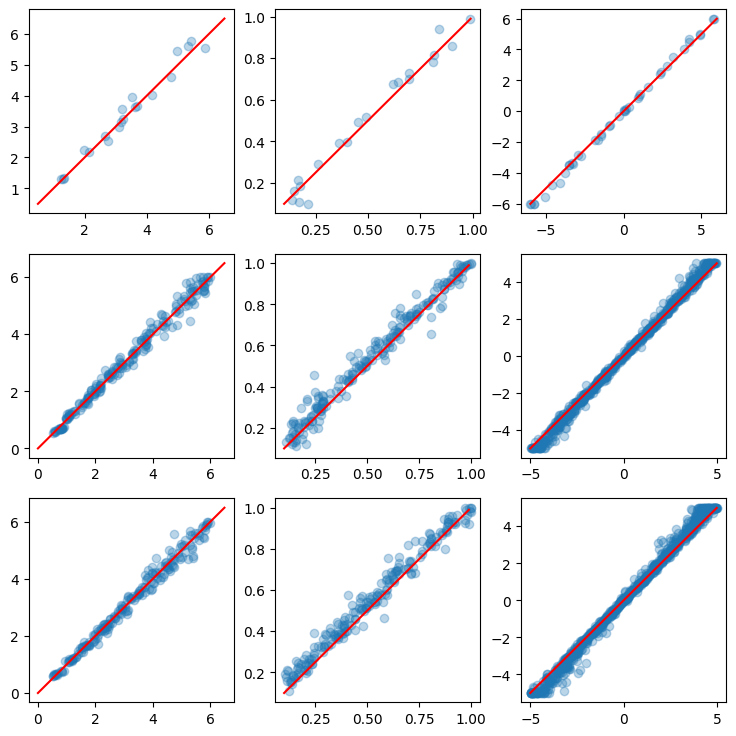

In [7]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(9, 9))

axs[0, 0].plot(np.arange(0.5, 6.5, 0.01), np.arange(0.5, 6.5, 0.01), c='red')
axs[0, 0].scatter(x=recovery_2d['threshold_true'], y=recovery_2d['threshold_estimate'], alpha=0.3);

axs[0, 1].plot(np.arange(0.1, 1, 0.01), np.arange(0.1, 1, 0.01), c='red')
axs[0, 1].scatter(x=recovery_2d['ndt_true'], y=recovery_2d['ndt_estimate'], alpha=0.3);

axs[0, 2].plot(np.arange(-6, 6, 0.01), np.arange(-6, 6, 0.01), c='red')
axs[0, 2].scatter(x=mu_2d_true, y=mu_2d_estimate, alpha=0.3);

############

axs[1, 0].plot(np.arange(0, 6.5, 0.01), np.arange(0, 6.5, 0.01), c='red')
axs[1, 0].scatter(x=recovery_3d['threshold_true'], y=recovery_3d['threshold_estimate'], alpha=0.3);

axs[1, 1].plot(np.arange(0.1, 1, 0.01), np.arange(0.1, 1, 0.01), c='red')
axs[1, 1].scatter(x=recovery_3d['ndt_true'], y=recovery_3d['ndt_estimate'], alpha=0.3);

axs[1, 2].plot(np.arange(-5, 5, 0.01), np.arange(-5, 5, 0.01), c='red')
axs[1, 2].scatter(x=mu_3d_true, y=mu_3d_estimate, alpha=0.3);

############

axs[2, 0].plot(np.arange(0, 6.5, 0.01), np.arange(0, 6.5, 0.01), c='red')
axs[2, 0].scatter(x=recovery_4d['threshold_true'], y=recovery_4d['threshold_estimate'], alpha=0.3);

axs[2, 1].plot(np.arange(0.1, 1, 0.01), np.arange(0.1, 1, 0.01), c='red')
axs[2, 1].scatter(x=recovery_4d['ndt_true'], y=recovery_4d['ndt_estimate'], alpha=0.3);

axs[2, 2].plot(np.arange(-5, 5, 0.01), np.arange(-5, 5, 0.01), c='red')
axs[2, 2].scatter(x=mu_4d_true, y=mu_4d_estimate, alpha=0.3);